**Question 1** : Please refer to the pdf




---

**Question 2**:    For the given data on canvas, construct a neural network for the regression task. Your network 
must have 1 hidden layer and 1 output layer. Use sigmoid to be your activation function for the 
hidden layer(s). You can choose the number of neurons in each layer using your intuition.  
 
The  data  is  already  split  to  have  your  input  data  for  training  (X_train.csv)  and  testing 
(X_train.csv)  and  their  corresponding  target  values  Y_train.csv  and  Y_test.csv, 
respectively. You can load the data as follows: 
 
X_train = np.loadtxt("X_train.csv") 
 
Implement the backpropagation algorithm and train your network until convergence.  

---

1.  What is the activation function that you will choose for the output layer? Justify your answer briefly.
> **We apply a linear activation for the final (output) layer because it is a regression problem.**
---
2.  How many neurons should there be in the output layer? Why?
> **Since we are predicting just one output value, our output layer should have just one neuron.**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
#files.upload()
xtest = np.loadtxt('/content/drive/MyDrive/X_test.csv')
xtrain = np.loadtxt('/content/drive/MyDrive/X_train.csv')
ytrain = np.loadtxt('/content/drive/MyDrive/Y_train.csv')
ytest = np.loadtxt('/content/drive/MyDrive/Y_test.csv')

In [50]:
def weights(neurons):
  W1 = np.random.rand(neurons, 2)
  B1 = np.random.rand(neurons, 1)
  W2 = np.random.rand(1, neurons)
  B2 = np.random.rand(1,1)
  return W1, B1, W2, B2

def MSE(y_predict, y):
  error = np.square(np.subtract(y,y_predict)).mean()
  return error

def accuracy(y_predicted, y):
  correct = 0
  wrong = 0
  total = 0
  diff =y - y_predicted
  for i in diff:
    total= total+1
    if i[0] > 1:
      wrong = wrong + 1
    if i[0] < 1:
      correct = correct + 1

  return (correct/total)*100

def sigmoid(x):
  return 1/(1 + np.exp(-x))
def relu(x):
  return max(0, x)
def tanh(x):
  return np.tanh(x)
def linear(x):
  return x

In [59]:
def forward_prop(neurons,  w1, b1, w2, b2):

  z1 = np.dot(w1, xtrain.T) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2, a1) + b2
  a2 = (z2)
  return z1, a1, z2, a2, w1, b1, w2, b2

neurons =3
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(1, w1, b1, w2, b2 )

In [70]:
def back_prop(z_1, a_1, z_2, a_2, w_1, b_1, w_2, b_2, alpha, itr, neurons ):
  MSEvsitr_train = []
  MSEvsitr_test = []
  ACCvsitr_train = []
  ACCvsitr_test = []


  for i in range(itr):

    dw2 = (np.dot((a_2 - ytrain), a_1.T))

    db2 = np.reshape((np.mean((a_2-ytrain), axis=1)), (1,1))
    dw1 = np.dot(np.dot(w_2.T, (a_2-ytrain)) * ((1-a_1) * a_1), xtrain)
    db1 = np.reshape((np.mean((np.dot(w_2.T, (a_2-ytrain)) * ((1-a_1) * a_1)),axis =1)), (neurons,1))

    
    w_1 = w_1 - (alpha * dw1)
    b_1 = b_1 - (alpha * db1)
    w_2 = w_2 - (alpha * dw2)
    b_2 = b_2 - (alpha * db2)

    testz1 = np.dot(w_1, xtest.T) + b_1
    testa1 = sigmoid(testz1)
    testz2 = np.dot(w_2, testa1) + b_2
    testa2 = (testz2) 

    Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w_1, b_1, w_2, b_2)
    z_1 = Z1
    a_1 = A1
    z_2 = Z2
    a_2 = A2
    w_1 = W1
    b_1 = B1
    w_2 = W2
    b_2 = B2
    MSEvsitr_train.append(MSE(a_2.T, ytrain.reshape(100, 1)))
    MSEvsitr_test.append(MSE(testa2.T, ytest.reshape(50,1)))
    ACCvsitr_train.append(accuracy(a_2.T, ytrain.reshape(100, 1)))
    ACCvsitr_test.append(accuracy(testa2.T, ytest.reshape(50,1)))

  return MSEvsitr_train, MSEvsitr_test,  ACCvsitr_train, ACCvsitr_test

itr= 1000
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.0001, itr, neurons)
# learning rate manipulated by trial and error based on the plot generated for learning rate vs accuracy
print(np.average(training_MSE))
print(np.average(test_MSE))
print(np.average(training_ACC))
print(np.average(test_ACC))

2887.4547163622815
3061.0606318636005
80.283
79.592


3.  Report the average MSE loss and the accuracy. 
**Average MSE loss :3064 <br>Average accuracy :80.396 for the test dataset**


---





4.  Plot the loss and accuracy as a function of the number of iterations.

**Plot of Loss vs Iterations**

Text(0, 0.5, 'Error')

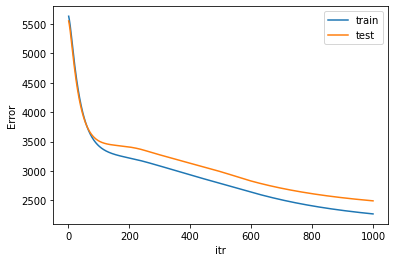

In [71]:
plt.plot(np.arange(1, itr+1), training_MSE, label="train")
plt.plot(np.arange(1, itr+1), test_MSE, label="test")
plt.legend()
plt.xlabel("itr")
plt.ylabel("Error")

**Plot of Accuracy vs Iterations**

Text(0, 0.5, 'Accuracy')

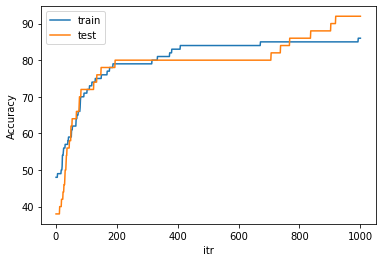

In [72]:
plt.plot(np.arange(1, itr+1),training_ACC ,label="train")
plt.plot(np.arange(1, itr+1),test_ACC ,label="test")
plt.legend()
plt.xlabel("itr")
plt.ylabel("Accuracy")

5.  What is the effect of the learning rate on the training process? Vary the learning rate to be 
between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate. 


> There is a probability that, as we alter the learning rate between 0.1 and 0.0001, we will reduce the MSE loss function in greater increments, which could lead to overshooting in this situation. It will take longer to converge if we choose Low learning rate values because they reduce the loss function more slowly. Finding the ideal balance is necessary.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


Text(0, 0.5, 'accuracy')

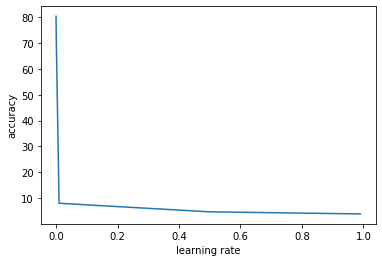

In [63]:
training_MSE1, test_MSE1, acc_tr1, acc_test1= back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.0001, itr, neurons)
training_MSE2, test_MSE2, acc_tr2, acc_test2= back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)
training_MSE3, test_MSE3, acc_tr3, acc_test3= back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.1, itr, neurons)
training_MSE4, test_MSE4, acc_tr4, acc_test4= back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.5, itr, neurons)
training_MSE5, test_MSE5, acc_tr5, acc_test5= back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.99, itr, neurons)

plt.plot([0.0001,0.001, 0.01, 0.5, 0.99] , [np.mean(acc_tr1), np.mean(acc_tr2), np.mean(acc_tr3), np.mean(acc_tr4), np.mean(acc_tr5)] )
plt.xlabel("learning rate")
plt.ylabel("accuracy")

6.  What is the effect of the number of neurons in the hidden layer? To answer this question, 
you will need to consider and answer the following: 


a.  You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not? 
<br>Update rule need not be changed as it is independent of numner of neurons.Increse in number of neurons means more weights to be calculated.

---
b.  Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.


<br>I experimented with changing the hidden layer's neuron count in order to compare accuracy and loss. More neurons are attempting to overfit the data. As a result, accuracy grows until a certain point and then starts to decrease as the number of neurons increases. It is ideal for this model to have 2 to 4 hidden layer neurons.

In [87]:
itr =100
neurons =1
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =2
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =3
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =4
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =5
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =6
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =7
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =8
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =9
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

neurons =10
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)



7.  What is the effect of the activation functions in the network? 
<br> **A neural network's activation function is crucial since it aids in capturing non-linearity in the data.
Also helps in binary classification when using the sigmoid function on the output data .**

<br>Exploring two different activation functions other than sigmoid such as tanh and linear  
a.  Will you need to change the update rule?b.  What is the change that you need to make to achieve this experiment? 
<br>We will need to change the update as shown in the pdf.

c.  Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description. 

In [104]:
def back_prop_linear(z_1, a_1, z_2, a_2, w_1, b_1, w_2, b_2, alpha, itr, neurons ):
  y_predicted=np.ones((100,1))
  MSEvsitr_train = []
  MSEvsitr_test = []
  ACCvsitr_train = []
  ACCvsitr_test = []


  for i in range(itr):

    dw2 = (np.dot((a_2 - ytrain), a_1.T))
    db2 = np.reshape((np.mean((a_2-ytrain), axis=1)), (1,1))
    dw1 = np.dot(np.dot(w_2.T, (a_2-ytrain)), xtrain)
    db1 = np.reshape((np.mean((np.dot(w_2.T, (a_2-ytrain))),axis =1)), (neurons,1))

    
    w_1 = w_1 - (alpha * dw1)
    b_1 = b_1 - (alpha * db1)
    w_2 = w_2 - (alpha * dw2)
    b_2 = b_2 - (alpha * db2)



    testz1 = np.dot(w_1, xtest.T) + b_1
    testa1 = testz1 
    testz2 = np.dot(w_2, testa1) + b_2
    testa2 = (testz2) 

    Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w_1, b_1, w_2, b_2)
    z_1 = Z1
    a_1 = A1
    z_2 = Z2
    a_2 = A2
    w_1 = W1
    b_1 = B1
    w_2 = W2
    b_2 = B2

    MSEvsitr_train.append(MSE(a_2.T, ytrain.reshape(100, 1)))
    MSEvsitr_test.append(MSE(testa2.T, ytest.reshape(50,1)))
    ACCvsitr_train.append(accuracy(a_2.T, ytrain.reshape(100, 1)))
    ACCvsitr_test.append(accuracy(testa2.T, ytest.reshape(50,1)))

  return MSEvsitr_train, MSEvsitr_test,  ACCvsitr_train, ACCvsitr_test


neurons =3
itr=1000
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop_linear(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.001, itr, neurons)

print(np.average(training_MSE))
print("Average Loss:",np.average(test_MSE))
print(np.average(training_ACC))
print("Average Accuracy:",np.average(test_ACC))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


2888.6049882215466
Average Loss: 30692118027708.05
74.416
Average Accuracy: 63.98


Text(0, 0.5, 'Error')

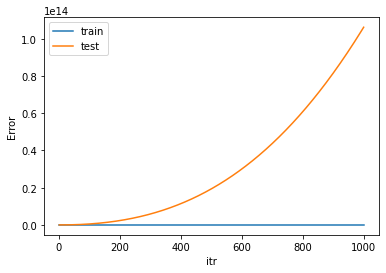

In [105]:
plt.plot(np.arange(1, itr+1), training_MSE, label="train")
plt.plot(np.arange(1, itr+1), test_MSE, label="test")
plt.legend()
plt.xlabel("itr")
plt.ylabel("Error")

Text(0, 0.5, 'Accuracy')

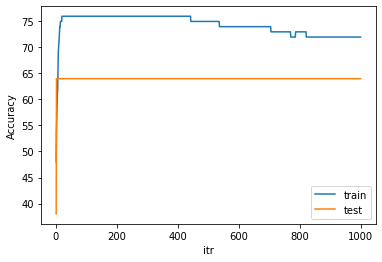

In [95]:
plt.plot(np.arange(1, itr+1),training_ACC ,label="train")
plt.plot(np.arange(1, itr+1),test_ACC ,label="test")
plt.legend()
plt.xlabel("itr")
plt.ylabel("Accuracy")

In [11]:
def back_prop_tanh(z_1, a_1, z_2, a_2, w_1, b_1, w_2, b_2, alpha, itr, NEURONS ):
  y_predicted=np.ones((100,1))
  MSEvsitr_train = []
  MSEvsitr_test = []
  ACCvsitr_train = []
  ACCvsitr_test = []

  for i in range(itr):

    dw2 = (np.dot((a_2 - ytrain), a_1.T))
    db2 = np.reshape((np.mean((a_2-ytrain), axis=1)), (1,1))
    dw1 = np.dot(np.dot(w_2.T, (a_2 - ytrain)) * (1 + tanh(z_1)) * (1 - tanh(z_1)), xtrain)
    db1 = np.dot(w_2.T, a_2 - ytrain) * (1 + tanh(z_1)) * (1 - tanh(z_1))

    
    w_1 = w_1 - (alpha * dw1)
    print(w_1)
    b_1 = b_1 - (alpha * db1)
    print(b_1)
    w_2 = w_2 - (alpha * dw2)
    b_2 = b_2 - (alpha * db2)


    testz1 = np.dot(w_1, xtest.T) + b_1
    testa1 = tanh(testz1)
    testz2 = np.dot(w_2, testa1) + b_2
    testa2 = (testz2) 

    Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w_1, b_1, w_2, b_2)
    z_1 = Z1
    a_1 = A1
    z_2 = Z2
    a_2 = A2
    w_1 = W1
    b_1 = B1
    w_2 = W2
    b_2 = B2

    MSEvsitr_train.append(MSE(a_2.T, ytrain.reshape(100, 1)))
    MSEvsitr_test.append(MSE(testa2.T, ytest.reshape(50,1)))
    ACCvsitr_train.append(accuracy(a_2.T, ytrain.reshape(100, 1)))
    ACCvsitr_test.append(accuracy(testa2.T, ytest.reshape(50,1)))

  return MSEvsitr_train, MSEvsitr_test,  ACCvsitr_train, ACCvsitr_test



neurons =1
itr=100
w1, b1, w2, b2 = weights(neurons)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_prop(neurons, w1, b1, w2, b2 )
training_MSE, test_MSE, training_ACC, test_ACC = back_prop_tanh(Z1, A1, Z2, A2, W1, B1, W2, B2, 0.01923345667, itr, neurons)
acc_test=np.array(acc_test)
acc_tr = np.array(acc_tr)
acc_testttt = acc_test
acc_trrrrr = acc_tr
print(training_MSE)
print(test_MSE)
#print(final_y)

[[-5.49999351 22.17605153]]
[[-0.20726618  0.26237315  0.18650728 -0.310815   -0.09755129  0.30357917
   0.39868086 -0.18792984  0.42035736 -0.05275285 -0.24862657  0.46634564
   0.20958372  0.01117215  0.24567324 -0.31539935  0.38001503 -0.2663121
  -0.28584713  0.30926595  0.31731188  0.41389628  0.10829686  0.20940653
  -0.23816388 -0.24280896 -0.30381532  0.32255027  0.37646717  0.24930202
  -0.20743302 -0.23114635 -0.27672997  0.29725922 -0.07632032  0.33098636
   0.3851326   0.20019876 -0.03743097 -0.44195768  0.20502824 -0.05439443
  -0.10140328 -0.01669871  0.38536135  0.22789237  0.22371196 -0.00245974
   0.12636022  0.32751564  0.15481797 -0.08811222  0.33163632  0.38831633
   0.4007343   0.26725397  0.42431024  0.36118742  0.31617687 -0.25497704
   0.12850061 -0.11655404 -0.06109046  0.4211848  -0.17025085  0.45084961
  -0.20325368  0.28670569  0.2387121  -0.32063184  0.38299511  0.11731909
  -0.29839854  0.17889517  0.21619432 -0.16989466  0.4405499  -0.23926039
  -0.270078

ValueError: ignored

In [ ]:
plt.plot(np.arange(1, itr+1), training_MSE, label="train")
plt.plot(np.arange(1, itr+1), test_MSE, label="test")
plt.legend()
plt.xlabel("itr")
plt.ylabel("Error")